<a href="https://colab.research.google.com/github/bhuvanabasapur/CMPE-258/blob/master/Assignments/Assignment%203/c3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using pure Tensorflow linear models to build neural network**

In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

import numpy as np
from tensorflow.keras import optimizers
from tensorflow.keras import layers

Generate  data

In [2]:
no_samples, input_dim = 500, 3 
X = np.random.uniform(-1, 1, (no_samples, input_dim))
#Initialise weights 
true_weights = np.array([[6, 1, 8], [-3, 1, 3]]).T
true_bias = np.array([1,1])

true_y = (X**2) @ true_weights + X @ true_weights + true_bias
print(f'X: {X.shape}, weights: {true_weights.shape}, bias: {true_bias.shape}, y: {true_y.shape}')

X: (500, 3), weights: (3, 2), bias: (2,), y: (500, 2)


Plotting the data

In [3]:
def plot_3D(title, X, y, y_pred=None):
  X_tnse = TSNE(n_components=2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tnse[:,0], X_tnse[:,1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
    ax.scatter(X_tnse[:,0], X_tnse[:,1], y_pred, label='y_pred', marker='v')
  plt.legend()
  plt.show()

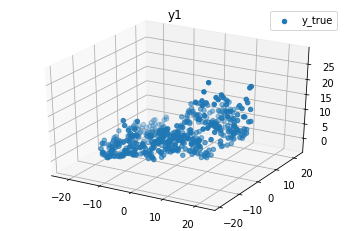

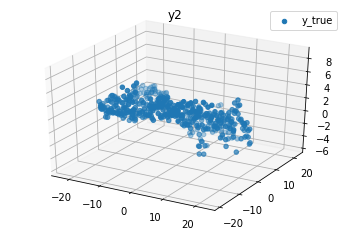

In [4]:
plot_3D('y1', X, true_y[:, 0])
plot_3D('y2', X, true_y[:, 1])

Fitting and Running the model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 10)                40        
_________________________________________________________________
regression (Dense)           (None, 2)                 22        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
16/16 [==============================] - 0s 1ms/step - loss: 21.1275
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 2.5211
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 1.0947
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6795
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - lo

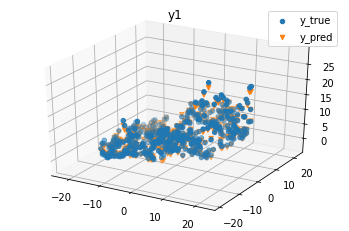

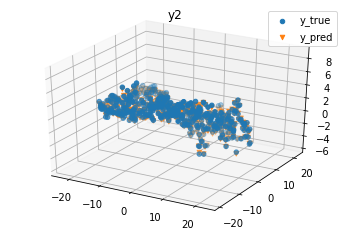

In [6]:
inputs = keras.Input(shape=(3,))
l1 = layers.Dense(10, activation='relu', name='dense1')(inputs)
outputs = layers.Dense(2, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

model.compile(loss ='mse', optimizer=optimizers.SGD(learning_rate=0.1))
model.fit(X, true_y, epochs=100)

pred_y =model.predict(X)

plot_3D('y1', X, true_y[:, 0], pred_y[:, 0])
plot_3D('y2', X, true_y[:, 1], pred_y[:, 1])